In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 假设您的数据已经保存在一个CSV文件中，读取数据
data = pd.read_csv(r'/Users/tangjiahong/Dropbox/Movie/Movie.csv')

# 生成LN_AUDIENCE变量
data['LN_AUDIENCE'] = np.log(data['Audience'] + 1)  # 假设Audience是票数

# 将所有变量名转换为大写
data.columns = map(str.upper, data.columns)

# 变量名称对照
variables = {
    'PlayID': 'PLAYID',
    'MovieID': 'MOVIEID',
    'PlayWeek': 'PLAYWEEK',
    'Weekend': 'WEEKEND',
    'Play_nWeek': 'PLAY_NWEEK',
    'PlayMonth': 'PLAYMONTH',
    'PlayYear': 'PLAYYEAR',
    'ViewDay': 'VIEWDAY',
    'CutBack': 'CUTBACK',
    'GHA_View_Code': 'GHA_VIEW_CODE',
    'TFF_View_Code': 'TFF_VIEW_CODE',
    'Theater_Class': 'THEATER_CLASS',
    'Audience': 'AUDIENCE',
    'Tempture': 'TEMPERATURE',
    'Rainfall': 'RAINFALL',
    'No_Weather': 'NO_WEATHER',
    'MovieFest': 'MOVIEFEST',
    'Rated': 'RATED',
    'Class_Darma': 'CLASS_DARMA',
    'Class_Comedy': 'CLASS_COMEDY',
    'Class_Action': 'CLASS_ACTION',
    'Class_Documentary': 'CLASS_DOCUMENTARY',
    'Class_Animation': 'CLASS_ANIMATION',
    'Class_Other': 'CLASS_OTHER',
    'Class_#N/A': 'CLASS_NA',
    'Movie_Length': 'MOVIE_LENGTH',
    'No_Movie_Length': 'NO_MOVIE_LENGTH',
    'Director_Award': 'DIRECTOR_AWARD',
    'Producer_Famous': 'PRODUCER_FAMOUS',
    'Distrbutor': 'DISTRIBUTOR',
    'Budget': 'BUDGET',
    'No_Budget': 'NO_BUDGET',
    'Actor_Awardall': 'ACTOR_AWARDALL',
    'Subsidy_Amount': 'SUBSIDY_AMOUNT',
    'Subsidy_Yes': 'SUBSIDY_YES',
    'IMDb_rating': 'IMDB_RATING',
    'No_IMDb': 'NO_IMDB',
    'Oscar_Nom': 'OSCAR_NOM',
    'Oscar_AwardTotal': 'OSCAR_AWARDTOTAL',
    'No_Oscar': 'NO_OSCAR',
    'Cannes_Nom': 'CANNES_NOM',
    'Cannes_AwardTotal': 'CANNES_AWARDTOTAL',
    'No_Cannes': 'NO_CANNES',
    'GHA_Nom': 'GHA_NOM',
    'GHA_AwardTotal': 'GHA_AWARDTOTAL',
    'No_GHA': 'NO_GHA',
    'TFF_Nom': 'TFF_NOM',
    'TFF_AwardTotal': 'TFF_AWARDTOTAL',
    'No_TFF': 'NO_TFF',
    'TFF_NomData': 'TFF_NOMDATA',
    'view_afhorse': 'VIEW_AFHORSE',
    'view_aftaipei': 'VIEW_AFTAIPEI',
    'year_2018': 'YEAR_2018',
    'year_2019': 'YEAR_2019',
    'year_2020': 'YEAR_2020',
    'year_2021': 'YEAR_2021',
    'year_2022': 'YEAR_2022',
    'month_2': 'MONTH_2',
    'month_3': 'MONTH_3',
    'month_4': 'MONTH_4',
    'month_5': 'MONTH_5',
    'month_6': 'MONTH_6',
    'month_7': 'MONTH_7',
    'month_8': 'MONTH_8',
    'month_9': 'MONTH_9',
    'month_10': 'MONTH_10',
    'month_11': 'MONTH_11',
    'month_12': 'MONTH_12',
    'view_week_1': 'VIEW_WEEK_1',
    'view_week_2': 'VIEW_WEEK_2',
    'view_week_3': 'VIEW_WEEK_3',
    'view_week_4': 'VIEW_WEEK_4',
    'view_week_58': 'VIEW_WEEK_58',
    'view_week_912': 'VIEW_WEEK_912',
    'theater_1': 'THEATER_1',
    'theater_2': 'THEATER_2',
    'theater_3': 'THEATER_3',
    'theater_4': 'THEATER_4',
    'rate_1': 'RATE_1',
    'rate_2': 'RATE_2',
    'rate_3': 'RATE_3',
    'rate_4': 'RATE_4',
    'distributor_1': 'DISTRIBUTOR_1',
    'distributor_2': 'DISTRIBUTOR_2',
    'distributor_3': 'DISTRIBUTOR_3',
    'lnsubsidy': 'LNSUBSIDY',
    'lnbudget': 'LNBUDGET'
}

# 特征和目标变量
X = data[['LN_AUDIENCE', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY',
          'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH',
          'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI',
          'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3',
          'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11',
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2',
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['IMDB_RATING']

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练Lasso回归模型
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression")
print("R^2 Score:", r2_score(y_test, y_pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

# 训练Ridge回归模型
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))

# 训练Elastic Net回归模型
elasticnet = ElasticNet(alpha=1.0)
elasticnet.fit(X_train, y_train)

y_pred_elasticnet = elasticnet.predict(X_test)
print("Elastic Net Regression")
print("R^2 Score:", r2_score(y_test, y_pred_elasticnet))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_elasticnet))


Lasso Regression
R^2 Score: 0.08697680097981764
Mean Squared Error: 3.3631680372760377
Ridge Regression
R^2 Score: 0.356359794627111
Mean Squared Error: 2.3708818883670393
Elastic Net Regression
R^2 Score: 0.08779628776962023
Mean Squared Error: 3.3601494154256932


In [2]:
data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')


In [2]:
import pandas as pd

data = pd.read_csv(r'/Users/tangjiahong/Dropbox/Movie/Movie.csv')

In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 假设 'data' 已经是一個包含相關欄位的 pandas DataFrame
# 定义自变量（X）和应变量（y）
X = data[['WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY',
          'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH',
          'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI',
          'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3',
          'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11',
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2',
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['LN_AUDIENCE']

# 添加常数项
X = sm.add_constant(X)

# 执行 OLS 回归分析
model = sm.OLS(y, X).fit()

# 提取系数并排序
coefficients = model.params.sort_values()
coefficients_df = pd.DataFrame(coefficients, columns=["Coefficient"])
coefficients_df_sorted = coefficients_df.sort_values(by="Coefficient")

# 输出回归结果总结
print("\nOLS Regression Summary:")
print(model.summary())

# 输出排序后的系数
print("\nSorted Coefficients:")
print(coefficients_df_sorted)



OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            LN_AUDIENCE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     458.4
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:46:55   Log-Likelihood:            -1.2777e+05
No. Observations:               74232   AIC:                         2.556e+05
Df Residuals:                   74191   BIC:                         2.560e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const        

In [14]:
# 计算每个特征的 VIF
 
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 输出 VIF 结果
print("VIF Results:")
print(vif_data)



VIF Results:
              Feature        VIF
0               const  91.720435
1             WEEKEND   1.007978
2             CUTBACK   1.255026
3           MOVIEFEST   1.009920
4         CLASS_DARMA   2.322538
5        CLASS_COMEDY   2.005178
6        CLASS_ACTION   1.234309
7   CLASS_DOCUMENTARY   2.040415
8     CLASS_ANIMATION   1.248184
9         CLASS_OTHER   1.909054
10       MOVIE_LENGTH   1.298986
11     DIRECTOR_AWARD   1.152229
12    PRODUCER_FAMOUS   1.411796
13     ACTOR_AWARDALL   1.132318
14       VIEW_AFHORSE   2.104463
15      VIEW_AFTAIPEI   1.233874
16          YEAR_2018   1.964592
17          YEAR_2019   1.939634
18          YEAR_2020   2.393768
19          YEAR_2021   2.484462
20          YEAR_2022   2.434336
21            MONTH_2   1.716725
22            MONTH_3   1.472133
23            MONTH_4   1.380049
24            MONTH_5   1.328791
25            MONTH_6   1.267960
26            MONTH_7   1.341611
27            MONTH_8   1.522561
28            MONTH_9   1.6902

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# 定义参数网格
param_grid = {'alpha': np.logspace(-6, 6, 13)}

# 使用交叉验证来选择最佳的超参数
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

print("Best parameters found: ", ridge_cv.best_params_)
print("Best cross-validation score: ", ridge_cv.best_score_)

# 使用最佳参数训练 Ridge 回归模型
best_ridge = ridge_cv.best_estimator_
y_pred_best_ridge = best_ridge.predict(X_test)

print("Ridge Regression with best alpha")
print("R^2 Score:", r2_score(y_test, y_pred_best_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best_ridge))


Best parameters found:  {'alpha': 0.1}
Best cross-validation score:  0.3526127038785682
Ridge Regression with best alpha
R^2 Score: 0.35637657356266794
Mean Squared Error: 2.370820082292642


In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 假設你的dataframe名為 'data'
# 將列名轉換為大寫
data.columns = map(str.upper, data.columns)

# 指定依變數和自變數
y = data['LN_AUDIENCE']
X = data[['IMDB_RATING', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 
          'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 
          'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 
          'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 
          'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1', 'DISTRIBUTOR_2']]

# 添加常數項到自變數
X = sm.add_constant(X)

# 擬合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型摘要
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            LN_AUDIENCE   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     506.8
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:16:16   Log-Likelihood:            -1.2660e+05
No. Observations:               74232   AIC:                         2.533e+05
Df Residuals:                   74189   BIC:                         2.537e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4407      0.04

In [29]:
# 計算每個特徵的VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 對VIF值進行排序
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# 打印VIF值
print(vif_data)


              feature        VIF
0               const  93.144474
38             RATE_1   2.909530
21          YEAR_2022   2.525174
20          YEAR_2021   2.501981
19          YEAR_2020   2.407264
5         CLASS_DARMA   2.322786
40             RATE_3   2.132208
15       VIEW_AFHORSE   2.114630
8   CLASS_DOCUMENTARY   2.043861
6        CLASS_COMEDY   2.006929
17          YEAR_2018   1.965697
18          YEAR_2019   1.950920
39             RATE_2   1.939558
10        CLASS_OTHER   1.925070
22            MONTH_2   1.717046
32        VIEW_WEEK_1   1.711690
29            MONTH_9   1.691613
33        VIEW_WEEK_2   1.626137
30           MONTH_10   1.583167
31           MONTH_11   1.557949
28            MONTH_8   1.522823
34        VIEW_WEEK_3   1.488158
23            MONTH_3   1.474616
13    PRODUCER_FAMOUS   1.413382
24            MONTH_4   1.383253
27            MONTH_7   1.341824
35        VIEW_WEEK_4   1.339037
25            MONTH_5   1.334023
11       MOVIE_LENGTH   1.312634
41      DI

                            OLS Regression Results                            
Dep. Variable:            IMDB_RATING   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     994.6
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:50:03   Log-Likelihood:            -1.3776e+05
No. Observations:               74232   AIC:                         2.756e+05
Df Residuals:                   74190   BIC:                         2.760e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2886      0.05

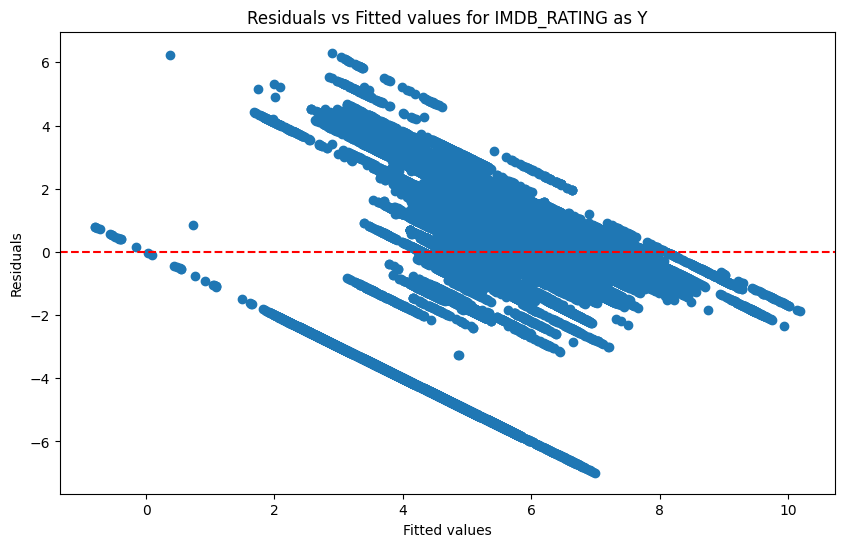

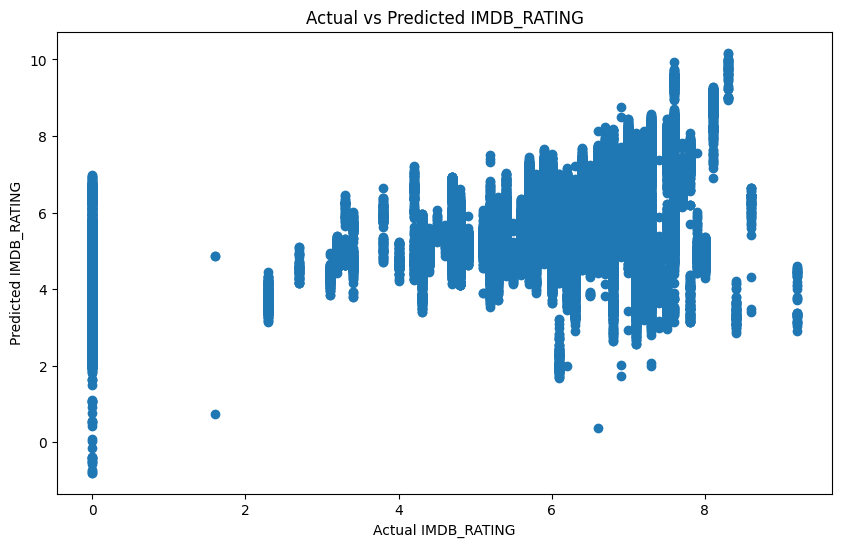

In [45]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 假設你的dataframe名為 'data'
# 將列名轉換為大寫
data.columns = map(str.upper, data.columns)

# 指定依變數和自變數
y = data['IMDB_RATING']
X = data[['LN_AUDIENCE', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 
          'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 
          'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 
          'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 
          'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]

# 添加常數項到自變數
X = sm.add_constant(X)

# 擬合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型摘要
print(model.summary())

# 繪製殘差圖
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values for IMDB_RATING as Y')
plt.show()

# 繪製實際值與預測值的散點圖
plt.figure(figsize=(10, 6))
plt.scatter(y, model.fittedvalues)
plt.xlabel('Actual IMDB_RATING')
plt.ylabel('Predicted IMDB_RATING')
plt.title('Actual vs Predicted IMDB_RATING')
plt.show()


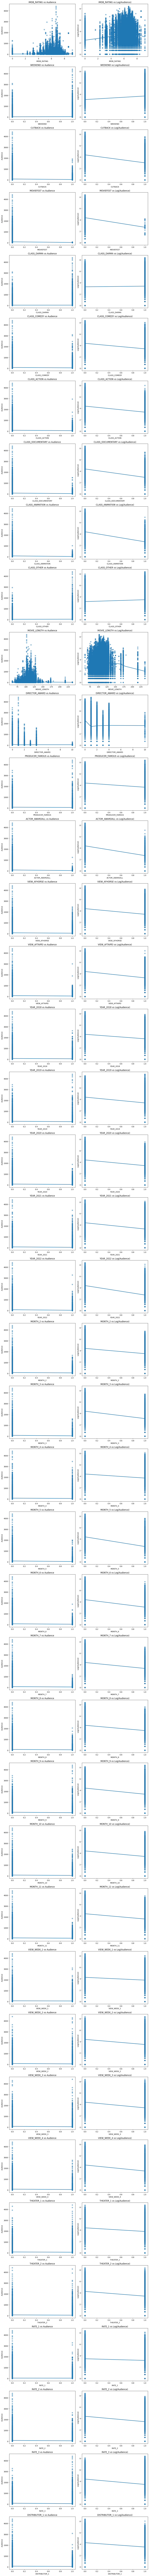

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables to compare
variables_to_compare = ['IMDB_RATING', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 
                        'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 
                        'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 
                        'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 
                        'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
                        'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
                        'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']

# Create the plot
fig, axs = plt.subplots(len(variables_to_compare), 2, figsize=(12, 5 * len(variables_to_compare)))

for i, var in enumerate(variables_to_compare):
    # Scatter plot of AUDIENCE vs variable
    sns.regplot(x=var, y='AUDIENCE', data=data, scatter_kws={'alpha':0.5}, lowess=True, ax=axs[i, 0])
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Audience')
    axs[i, 0].set_title(f'{var} vs Audience')

    # Scatter plot of Log(AUDIENCE) vs variable
    sns.regplot(x=var, y=np.log(data['AUDIENCE'] + 1), data=data, scatter_kws={'alpha':0.5}, lowess=True, ax=axs[i, 1])
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_ylabel('Log(Audience)')
    axs[i, 1].set_title(f'{var} vs Log(Audience)')

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# 假設數據已經讀取到data變量中
# 準備自變量和應變量
X = data[['IMDB_RATING', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 
          'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 
          'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 
          'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 
          'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['AUDIENCE']
log_y = np.log(data['AUDIENCE'] + 1)

# 拟合线性模型
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)
r2_linear = r2_score(y, y_pred)

# 拟合多项式模型
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_poly_pred)

# 拟合取对数后的线性模型
linear_model_log = LinearRegression()
linear_model_log.fit(X, log_y)
log_y_pred = linear_model_log.predict(X)
r2_linear_log = r2_score(log_y, log_y_pred)

# 拟合取对数后的多项式模型
poly_model_log = LinearRegression()
poly_model_log.fit(X_poly, log_y)
log_y_poly_pred = poly_model_log.predict(X_poly)
r2_poly_log = r2_score(log_y, log_y_poly_pred)

print(f'R2 線性: {r2_linear}, R2 多項式: {r2_poly}')
print(f'R2 線性 (取對數後): {r2_linear_log}, R2 多項式 (取對數後): {r2_poly_log}')


R2 線性: 0.119857268210254, R2 多項式: 0.39486485069348154
R2 線性 (取對數後): 0.21464983820986316, R2 多項式 (取對數後): 0.49159339162785876


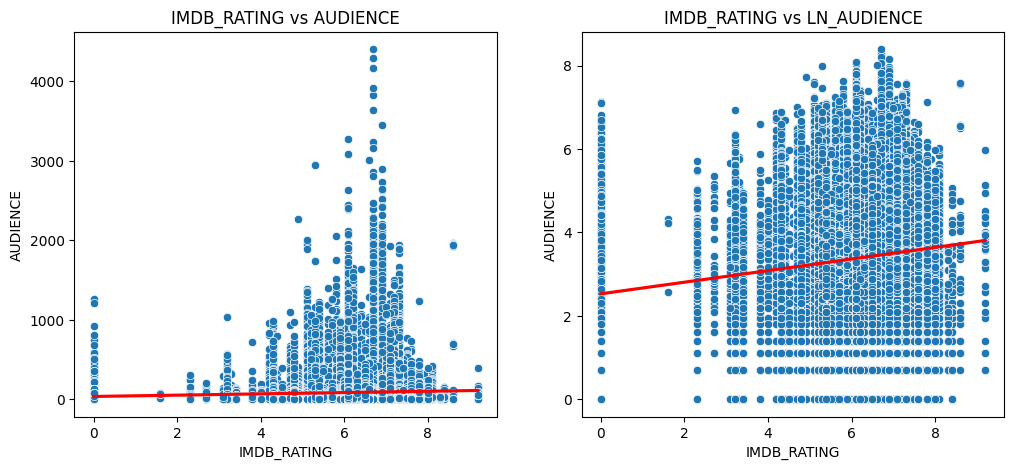

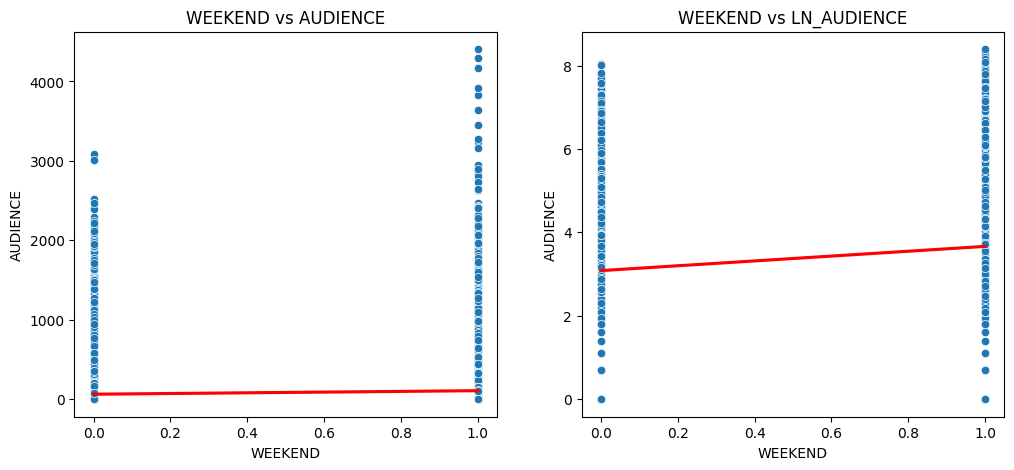

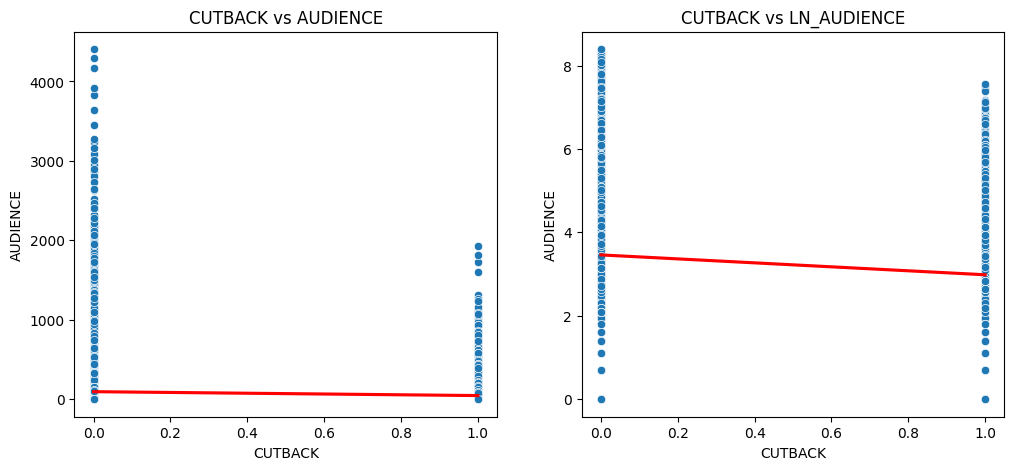

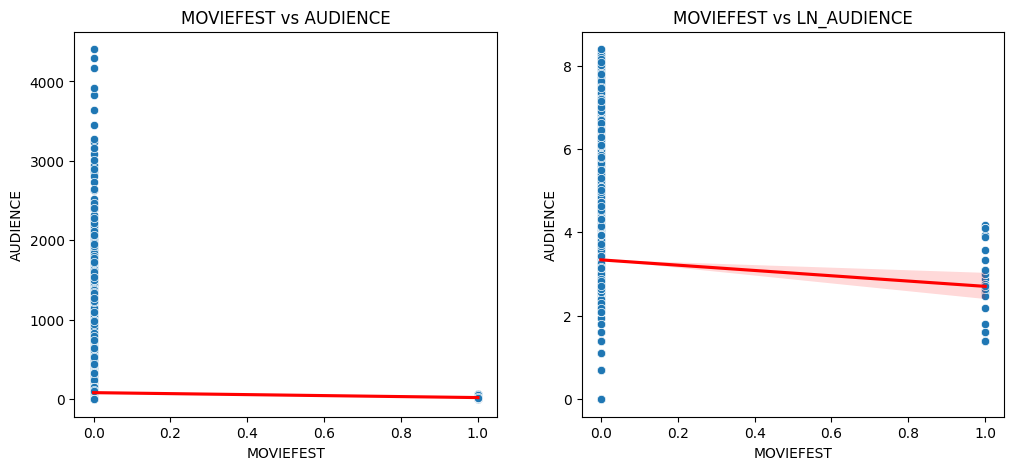

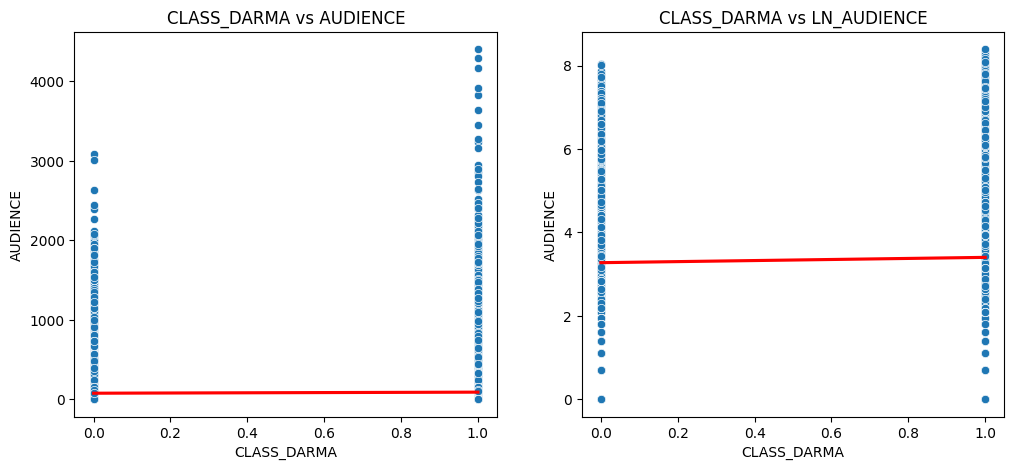

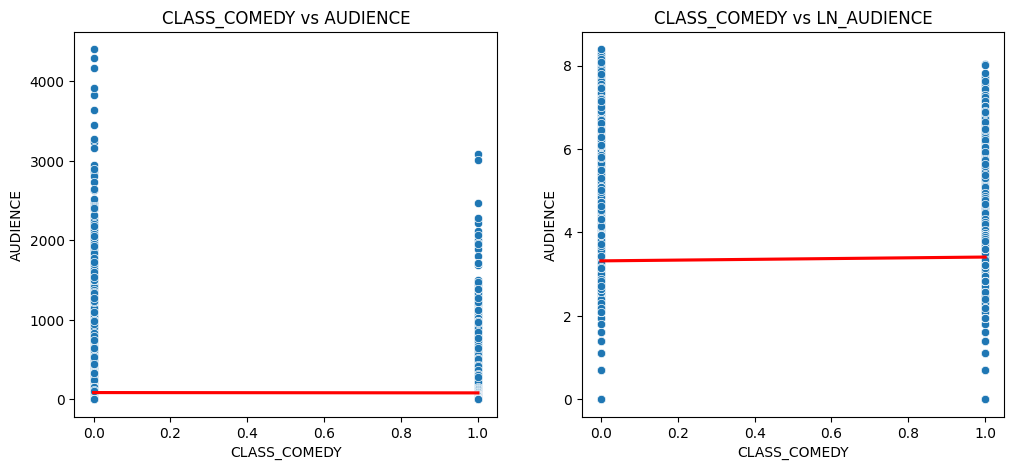

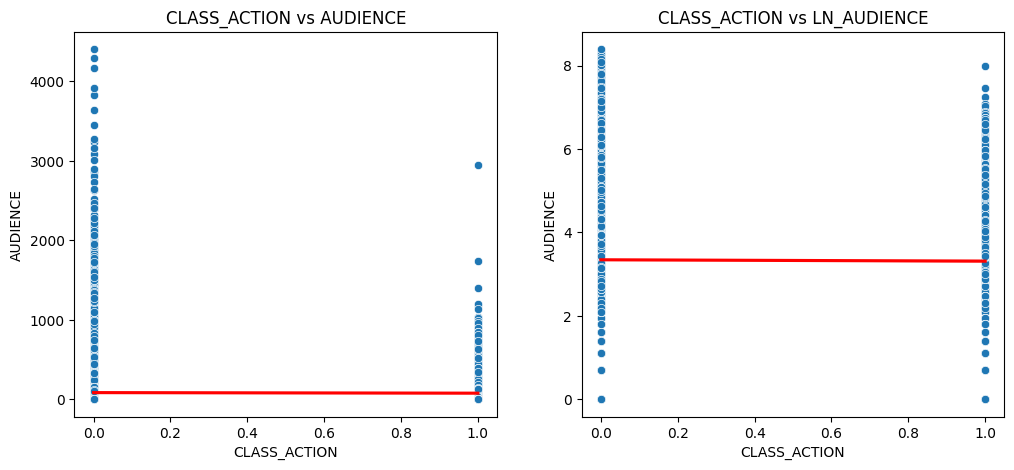

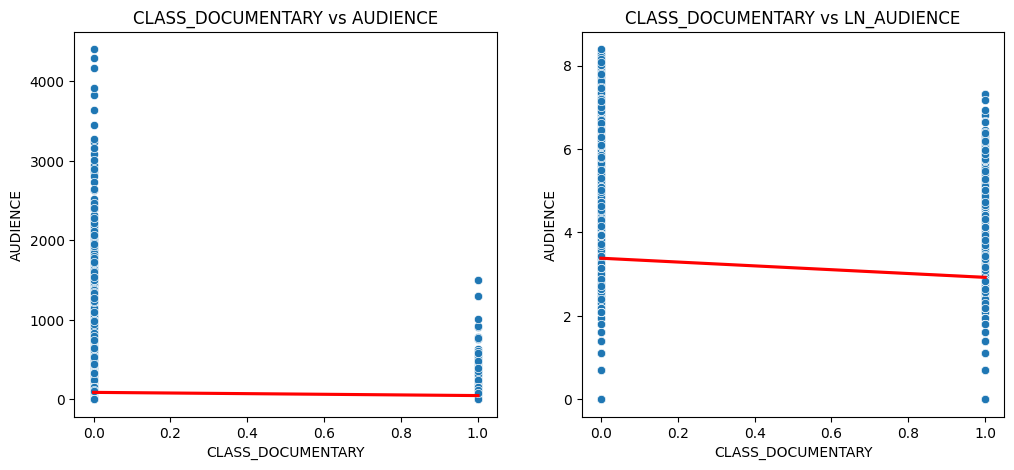

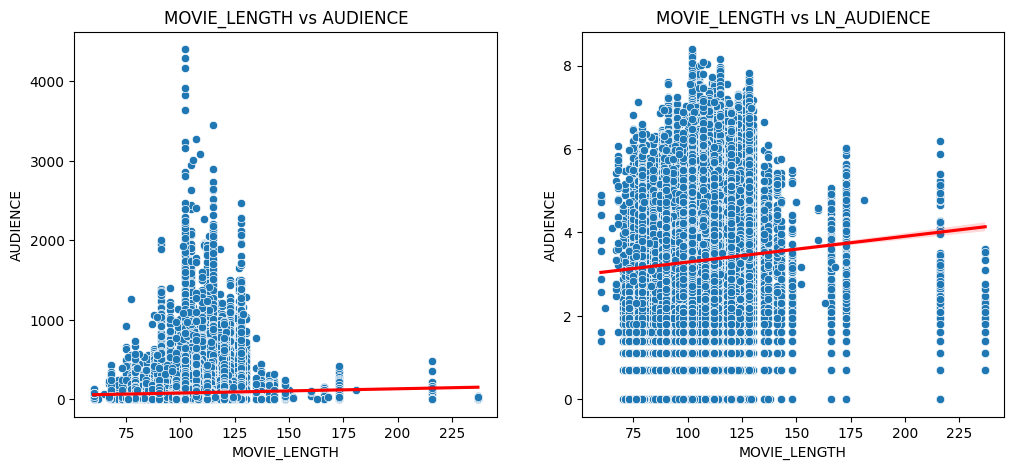

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 選擇一些變量來展示
selected_variables = ['IMDB_RATING', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 
                      'CLASS_COMEDY', 'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'MOVIE_LENGTH']

for var in selected_variables:
    plt.figure(figsize=(12, 5))

    # 原始票數的散點圖和回歸線
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=data[var], y=data['AUDIENCE'])
    sns.regplot(x=data[var], y=data['AUDIENCE'], scatter=False, color='red')
    plt.title(f'{var} vs AUDIENCE')

    # 對數票數的散點圖和回歸線
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data[var], y=np.log(data['AUDIENCE'] + 1))
    sns.regplot(x=data[var], y=np.log(data['AUDIENCE'] + 1), scatter=False, color='red')
    plt.title(f'{var} vs LN_AUDIENCE')

    plt.show()


                            OLS Regression Results                            
Dep. Variable:            LN_AUDIENCE   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     494.6
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:50:19   Log-Likelihood:            -1.2700e+05
No. Observations:               74232   AIC:                         2.541e+05
Df Residuals:                   74190   BIC:                         2.545e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2974      0.04

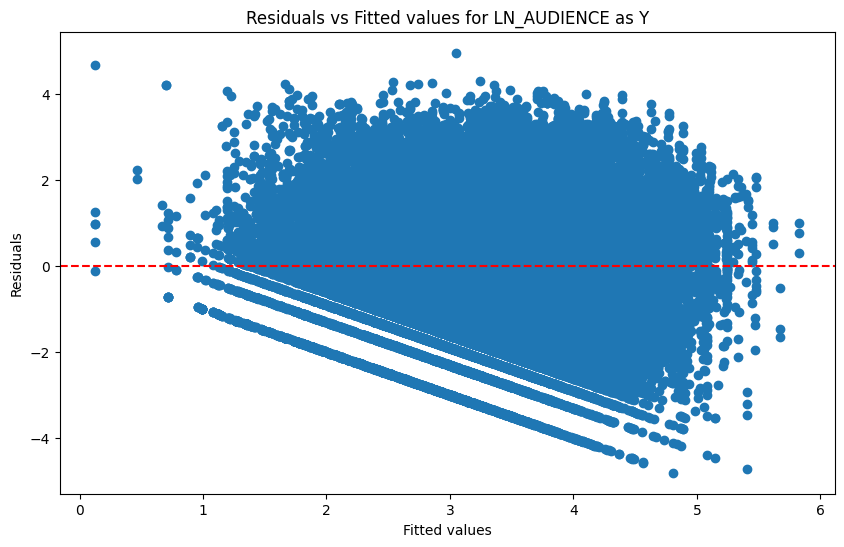

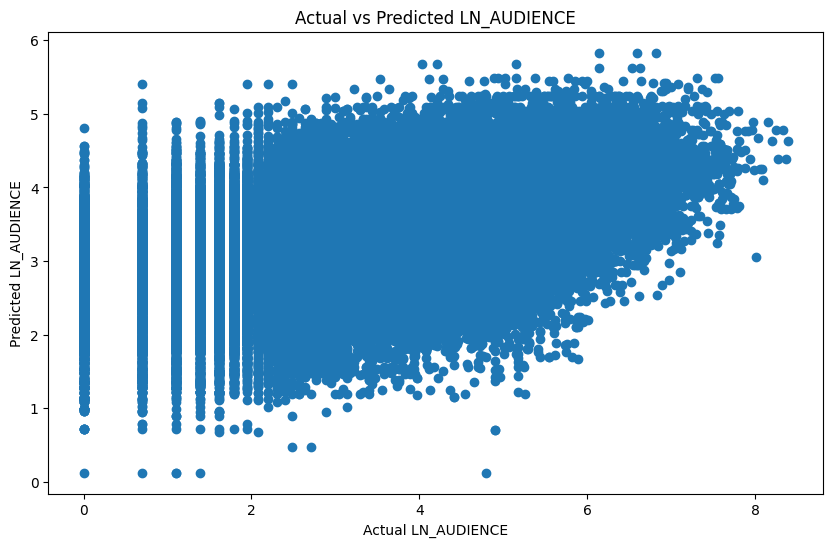

In [46]:
# 指定依變數和自變數
y = data['LN_AUDIENCE']
X = data[['IMDB_RATING', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 
          'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 
          'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 
          'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 
          'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]

# 添加常數項到自變數
X = sm.add_constant(X)

# 擬合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型摘要
print(model.summary())

# 繪製殘差圖
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values for LN_AUDIENCE as Y')
plt.show()

# 繪製實際值與預測值的散點圖
plt.figure(figsize=(10, 6))
plt.scatter(y, model.fittedvalues)
plt.xlabel('Actual LN_AUDIENCE')
plt.ylabel('Predicted LN_AUDIENCE')
plt.title('Actual vs Predicted LN_AUDIENCE')
plt.show()


                            OLS Regression Results                            
Dep. Variable:            LN_AUDIENCE   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     494.6
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:50:41   Log-Likelihood:            -1.2700e+05
No. Observations:               74232   AIC:                         2.541e+05
Df Residuals:                   74190   BIC:                         2.545e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2974      0.04

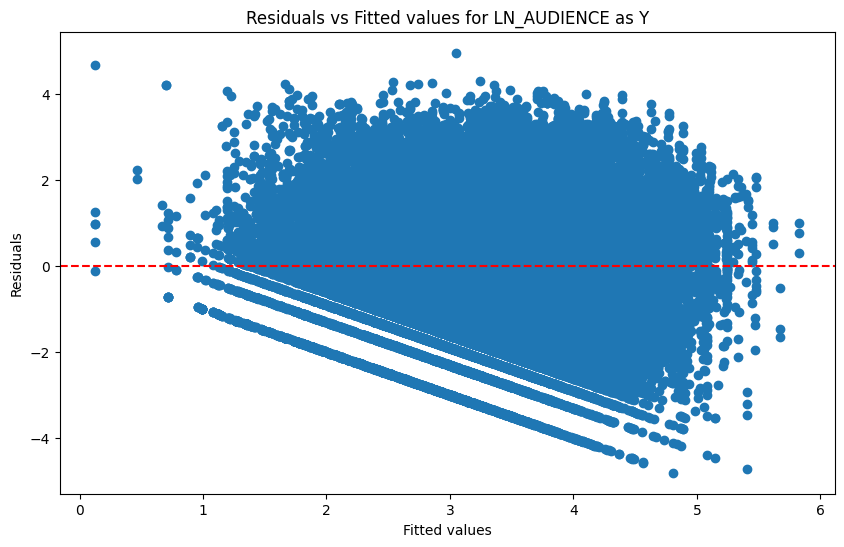

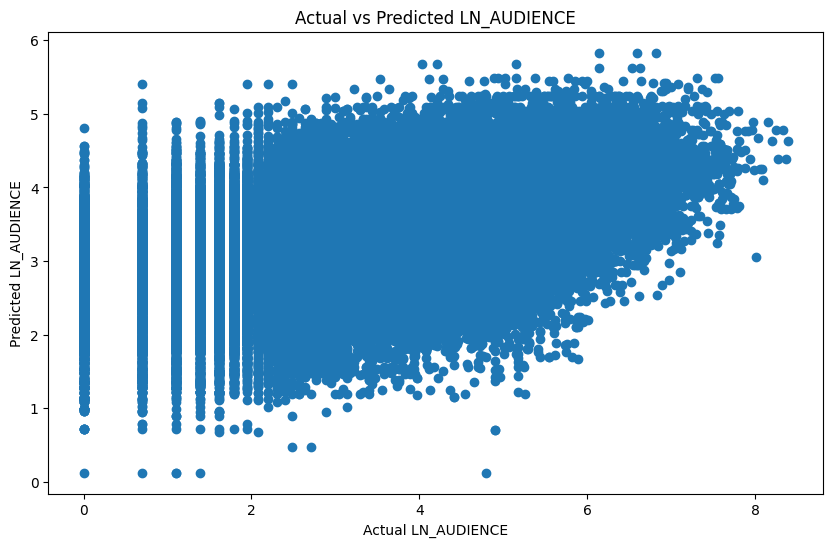

In [47]:
# 指定依變數和自變數
y = data['LN_AUDIENCE']
X = data[['IMDB_RATING', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 
          'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 
          'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 
          'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 
          'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]

# 添加常數項到自變數
X = sm.add_constant(X)

# 擬合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型摘要
print(model.summary())

# 繪製殘差圖
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values for LN_AUDIENCE as Y')
plt.show()

# 繪製實際值與預測值的散點圖
plt.figure(figsize=(10, 6))
plt.scatter(y, model.fittedvalues)
plt.xlabel('Actual LN_AUDIENCE')
plt.ylabel('Predicted LN_AUDIENCE')
plt.title('Actual vs Predicted LN_AUDIENCE')
plt.show()


                            OLS Regression Results                            
Dep. Variable:               AUDIENCE   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     246.4
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:50:53   Log-Likelihood:            -4.8404e+05
No. Observations:               74232   AIC:                         9.682e+05
Df Residuals:                   74190   BIC:                         9.686e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -100.9461      5.86

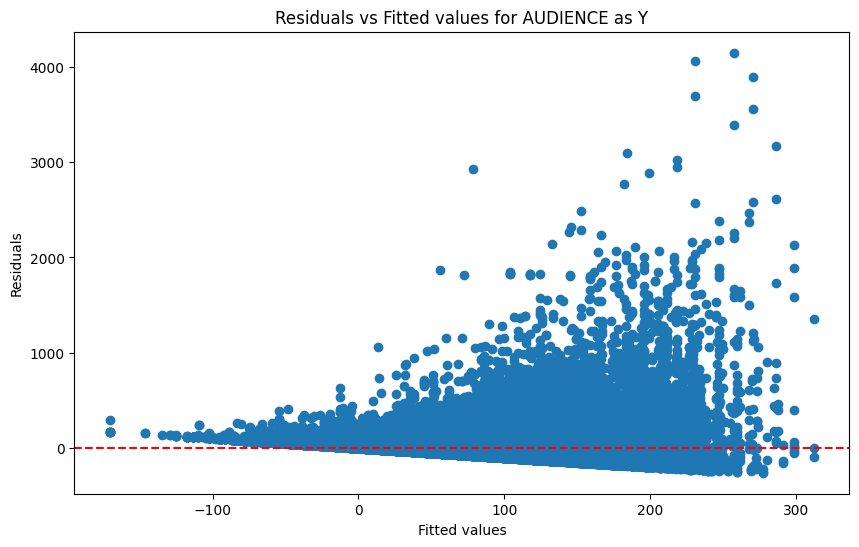

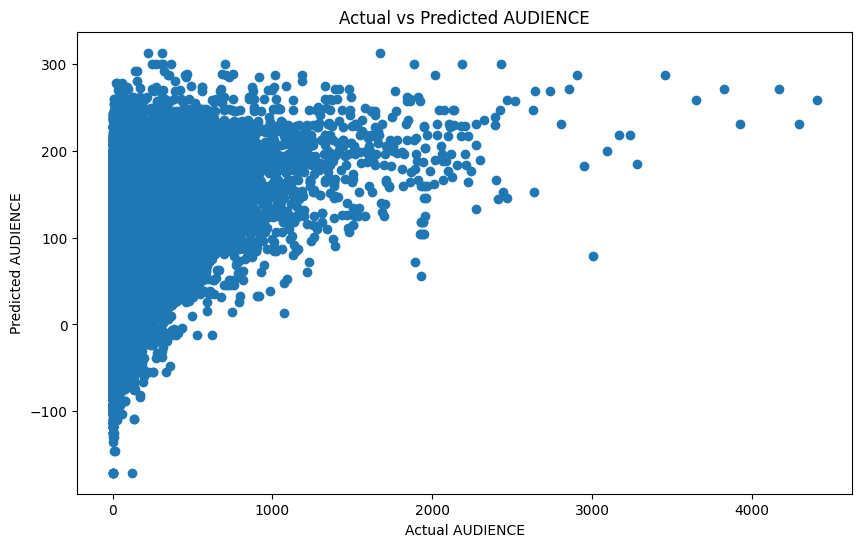

In [48]:
# 指定依變數和自變數
y = data['AUDIENCE']
X = data[['IMDB_RATING', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 
          'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 
          'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 
          'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 
          'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 
          'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]

# 添加常數項到自變數
X = sm.add_constant(X)

# 擬合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型摘要
print(model.summary())

# 繪製殘差圖
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values for AUDIENCE as Y')
plt.show()

# 繪製實際值與預測值的散點圖
plt.figure(figsize=(10, 6))
plt.scatter(y, model.fittedvalues)
plt.xlabel('Actual AUDIENCE')
plt.ylabel('Predicted AUDIENCE')
plt.title('Actual vs Predicted AUDIENCE')
plt.show()


1. 用存活分析去觀察電影票房壽命(ViewDay) 
2. DID 去評估有沒有獲獎對票房的影響(這可能只能用沒有缺失值的資料 就是要刪資料) 
3. 分量迴歸去跑 IMDB在不同票房水準的評價 
4. 特徵價格法評估 不同類型電影在票房的貢獻度

<Axes: xlabel='timeline'>

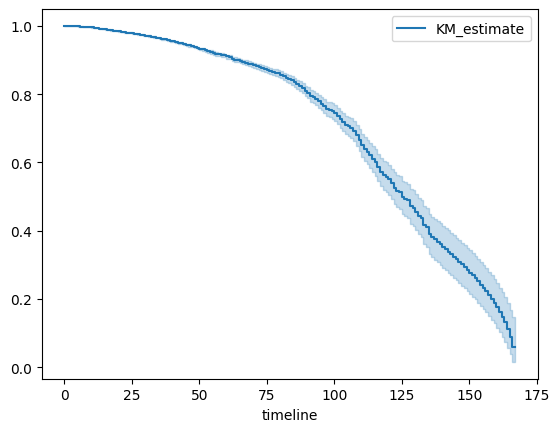

In [37]:
# 存活分析
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
# Convert column names to uppercase
data = pd.read_csv(r'/Users/tangjiahong/Dropbox/Movie/Movie.csv')

data.columns = map(str.upper, data.columns)

# Survival Analysis using Kaplan-Meier
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(data['VIEWDAY'], event_observed=data['AUDIENCE'] == 0)

# Plot the survival function
kmf.plot_survival_function()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column MOVIEFEST have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['AUDIENCE'].astype(bool)
>>> print(df.loc[events, 'MOVIEFEST'].var())
>>> print(df.loc[~events, 'MOVIEFEST'].var())

A very low variance means that the column MOVIEFEST completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 2.192. This may imply non-unique sol

                        coef     exp(coef)     se(coef)  coef lower 95%  \
covariate                                                                 
WEEKEND             0.211140  1.235086e+00     0.007618        0.196210   
CUTBACK             0.131819  1.140902e+00     0.009565        0.113073   
MOVIEFEST           0.279146  1.322000e+00     0.175128       -0.064099   
CLASS_DARMA         0.046468  1.047565e+00     0.011447        0.024032   
CLASS_COMEDY        0.014991  1.015104e+00     0.012118       -0.008760   
CLASS_ACTION        0.005046  1.005058e+00     0.016876       -0.028031   
CLASS_DOCUMENTARY   0.201580  1.223334e+00     0.019034        0.164274   
CLASS_ANIMATION     0.004407  1.004416e+00     0.027403       -0.049303   
CLASS_OTHER        -0.043818  9.571285e-01     0.010419       -0.064239   
MOVIE_LENGTH       -0.002953  9.970513e-01     0.000294       -0.003529   
DIRECTOR_AWARD     -0.044758  9.562291e-01     0.005413       -0.055368   
PRODUCER_FAMOUS    -0.102

<Axes: xlabel='log(HR) (95% CI)'>

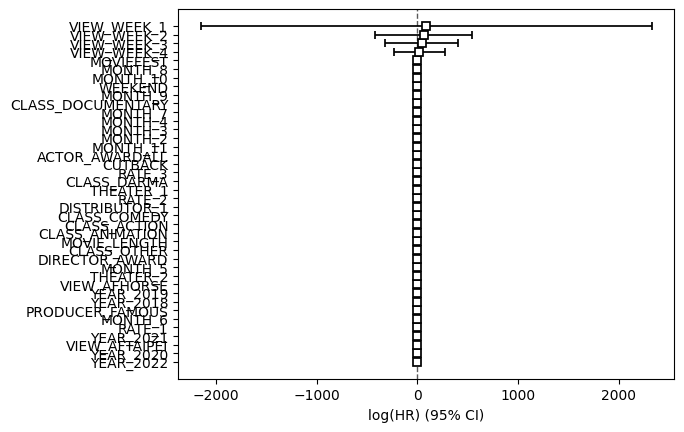

In [36]:
import pandas as pd
from lifelines import CoxPHFitter

# 读取数据并将列名转换为大写
data = pd.read_csv(r'/Users/tangjiahong/Dropbox/Movie/Movie.csv')
data.columns = map(str.upper, data.columns)

# 定义需要使用的自变量
covariates = ['WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY',
              'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 
              'MOVIE_LENGTH', 'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 
              'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 
              'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 
              'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
              'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 
              'THEATER_1', 'THEATER_2', 'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']

# 准备数据
df = data[['VIEWDAY', 'AUDIENCE'] + covariates]

# 初始化CoxPHFitter并拟合数据
cph = CoxPHFitter()
cph.fit(df, duration_col='VIEWDAY', event_col='AUDIENCE')

# 输出模型摘要
print(cph.summary)

# 绘制基准风险曲线
cph.plot()


In [38]:
events = df['AUDIENCE'].astype(bool)
print("Variance of MOVIEFEST when event occurred:", df.loc[events, 'MOVIEFEST'].var())
print("Variance of MOVIEFEST when event did not occur:", df.loc[~events, 'MOVIEFEST'].var())


Variance of MOVIEFEST when event occurred: 0.0004568611323911262
Variance of MOVIEFEST when event did not occur: 0.0


                        coef     exp(coef)     se(coef)  coef lower 95%  \
covariate                                                                 
WEEKEND             0.211280  1.235258e+00     0.007617        0.196352   
CUTBACK             0.131638  1.140695e+00     0.009564        0.112893   
CLASS_DARMA         0.045609  1.046665e+00     0.011434        0.023198   
CLASS_COMEDY        0.014134  1.014234e+00     0.012105       -0.009592   
CLASS_ACTION        0.004477  1.004487e+00     0.016871       -0.028591   
CLASS_DOCUMENTARY   0.200231  1.221686e+00     0.019015        0.162963   
CLASS_ANIMATION     0.003732  1.003739e+00     0.027400       -0.049972   
CLASS_OTHER        -0.044757  9.562298e-01     0.010402       -0.065145   
MOVIE_LENGTH       -0.002957  9.970469e-01     0.000294       -0.003534   
DIRECTOR_AWARD     -0.044830  9.561605e-01     0.005413       -0.055439   
PRODUCER_FAMOUS    -0.102370  9.026955e-01     0.014973       -0.131717   
ACTOR_AWARDALL      0.152

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 2.192. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<Axes: xlabel='log(HR) (95% CI)'>

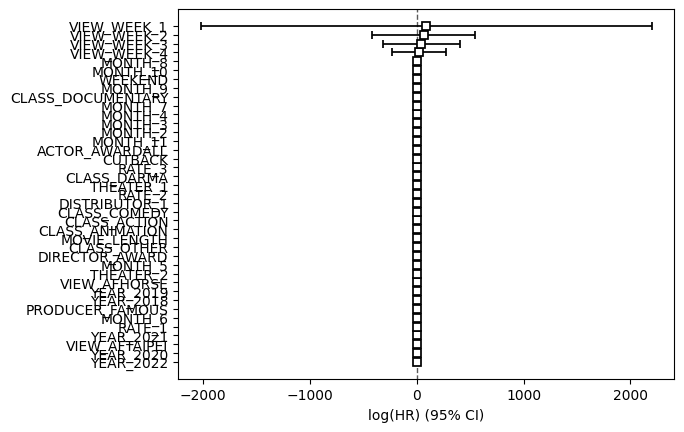

In [39]:
import pandas as pd
from lifelines import CoxPHFitter

# 读取数据并将列名转换为大写
data = pd.read_csv(r'/Users/tangjiahong/Dropbox/Movie/Movie.csv')
data.columns = map(str.upper, data.columns)

# 去除具有低方差或高共线性的变量
covariates = ['WEEKEND', 'CUTBACK', 'CLASS_DARMA', 'CLASS_COMEDY',
              'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 
              'MOVIE_LENGTH', 'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 
              'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 
              'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 
              'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
              'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 
              'THEATER_1', 'THEATER_2', 'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']

# 准备数据
df = data[['VIEWDAY', 'AUDIENCE'] + covariates]

# 初始化CoxPHFitter并拟合数据
cph = CoxPHFitter()
cph.fit(df, duration_col='VIEWDAY', event_col='AUDIENCE')

# 输出模型摘要
print(cph.summary)

# 绘制基准风险曲线
cph.plot()


                       coef   exp(coef)  se(coef)  coef lower 95%  \
covariate                                                           
WEEKEND            0.155363    1.168082  0.007160        0.141329   
CUTBACK            0.126577    1.134937  0.008931        0.109073   
CLASS_DARMA        0.030754    1.031232  0.009682        0.011778   
CLASS_COMEDY       0.062556    1.064554  0.010242        0.042482   
CLASS_ACTION      -0.040465    0.960343  0.015655       -0.071149   
CLASS_DOCUMENTARY  0.218316    1.243980  0.016240        0.186486   
CLASS_ANIMATION   -0.013783    0.986311  0.025317       -0.063403   
CLASS_OTHER       -0.149308    0.861304  0.009169       -0.167279   
MOVIE_LENGTH      -0.006246    0.993773  0.000286       -0.006806   
DIRECTOR_AWARD    -0.063833    0.938162  0.005070       -0.073770   
PRODUCER_FAMOUS   -0.165447    0.847515  0.013741       -0.192379   
ACTOR_AWARDALL     0.258321    1.294754  0.034918        0.189882   
VIEW_AFHORSE      -0.211583    0.8

<Axes: xlabel='log(HR) (95% CI)'>

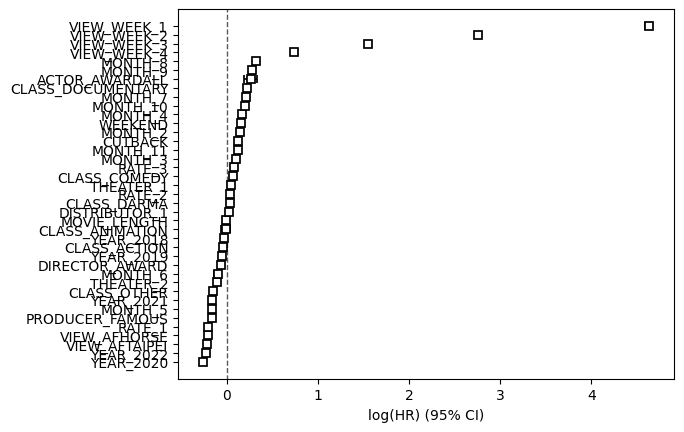

In [40]:
import pandas as pd
from lifelines import CoxPHFitter

# 读取数据并将列名转换为大写
data = pd.read_csv(r'/Users/tangjiahong/Dropbox/Movie/Movie.csv')
data.columns = map(str.upper, data.columns)

# 定义需要使用的自变量
covariates = ['WEEKEND', 'CUTBACK', 'CLASS_DARMA', 'CLASS_COMEDY',
              'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 
              'MOVIE_LENGTH', 'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 
              'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 
              'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 
              'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
              'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 
              'THEATER_1', 'THEATER_2', 'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']

# 准备数据
df = data[['VIEWDAY', 'AUDIENCE'] + covariates]

# 初始化CoxPHFitter并添加正则化参数
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df, duration_col='VIEWDAY', event_col='AUDIENCE')

# 输出模型摘要
print(cph.summary)

# 绘制基准风险曲线
cph.plot()


## 隨著時間增加，票房生存概率逐漸下降，表明隨著上映時間的延長，票房收入逐漸減少。這是預期的，因為大多數電影的票房收入在上映初期最高，然後逐漸減少。

In [16]:
# DID
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

# Convert column names to uppercase
data.columns = map(str.upper, data.columns)

# Create the treatment and post event variables
data['AWARDED'] = (data['GHA_VIEW_CODE'] == 4) | (data['TFF_VIEW_CODE'] == 4)
data['POST_EVENT'] = data['VIEWDAY'] > data['VIEWDAY'].median()

# Interaction term
data['AWARDED_POST_EVENT'] = data['AWARDED'] * data['POST_EVENT']

# DID Regression
model = ols('AUDIENCE ~ AWARDED + POST_EVENT + AWARDED_POST_EVENT', data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               AUDIENCE   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     407.3
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          1.84e-262
Time:                        19:09:54   Log-Likelihood:            -4.8818e+05
No. Observations:               74232   AIC:                         9.764e+05
Df Residuals:                   74228   BIC:                         9.764e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [8]:
# 分量迴歸
import pandas as pd
import statsmodels.formula.api as smf

data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

# Convert column names to uppercase
data.columns = map(str.upper, data.columns)

# Quantile regression at different quantiles
quantiles = [0.25, 0.5, 0.75]
results = []

for q in quantiles:
    mod = smf.quantreg('IMDB_RATING ~ LN_AUDIENCE + WEEKEND + CUTBACK + MOVIEFEST + CLASS_DARMA + CLASS_COMEDY + CLASS_ACTION + CLASS_DOCUMENTARY + CLASS_ANIMATION + CLASS_OTHER + MOVIE_LENGTH + DIRECTOR_AWARD + PRODUCER_FAMOUS + ACTOR_AWARDALL + VIEW_AFHORSE + VIEW_AFTAIPEI + YEAR_2018 + YEAR_2019 + YEAR_2020 + YEAR_2021 + YEAR_2022 + MONTH_2 + MONTH_3 + MONTH_4 + MONTH_5 + MONTH_6 + MONTH_7 + MONTH_8 + MONTH_9 + MONTH_10 + MONTH_11 + VIEW_WEEK_1 + VIEW_WEEK_2 + VIEW_WEEK_3 + VIEW_WEEK_4 + THEATER_1 + THEATER_2 + RATE_1 + RATE_2 + RATE_3 + DISTRIBUTOR_1', data)
    res = mod.fit(q=q)
    results.append((q, res))

# Print summary for each quantile
for q, res in results:
    print(f'Quantile: {q}')
    print(res.summary())


Quantile: 0.25
                         QuantReg Regression Results                          
Dep. Variable:            IMDB_RATING   Pseudo R-squared:               0.3805
Model:                       QuantReg   Bandwidth:                     0.06893
Method:                 Least Squares   Sparsity:                        1.179
Date:                Sat, 01 Jun 2024   No. Observations:                74232
Time:                        19:39:47   Df Residuals:                    74190
                                        Df Model:                           41
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7020      0.017    155.142      0.000       2.668       2.736
LN_AUDIENCE           0.0787      0.001     56.133      0.000       0.076       0.081
WEEKEND              -0.0373      0.004     -9.642      0.000      -0.045      -0.030
CU

C:\Users\User\AppData\Local\Temp\ipykernel_25844\2695706910.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_25844\2695706910.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_25844\2695706910.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palet

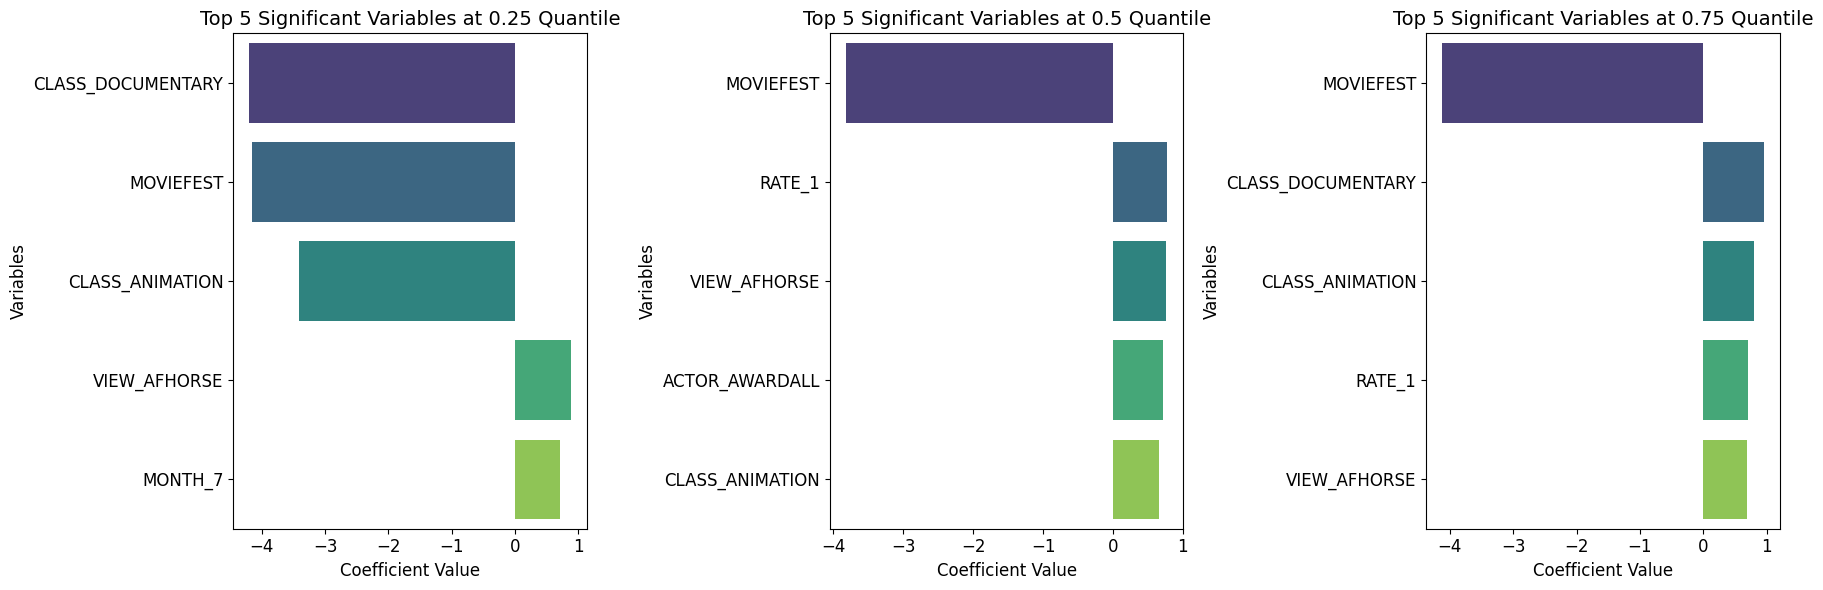

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg


# 定義自變數和應變數
X = data[['LN_AUDIENCE', 'WEEKEND', 'CUTBACK', 'MOVIEFEST', 'CLASS_DARMA', 'CLASS_COMEDY', 
          'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 
          'MOVIE_LENGTH', 'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 
          'VIEW_AFHORSE', 'VIEW_AFTAIPEI', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 
          'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 
          'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 
          'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 
          'THEATER_1', 'THEATER_2', 'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['IMDB_RATING']

# 分量迴歸並挑選前五個重要變數
quantiles = [0.25, 0.5, 0.75]
top_vars = {}

for q in quantiles:
    model = QuantReg(y, X).fit(q=q)
    params = model.params
    pvalues = model.pvalues
    significant_params = params[pvalues < 0.05]
    top5 = significant_params.abs().sort_values(ascending=False).head(5)
    top_vars[q] = top5.index

# 視覺化前五個重要變數
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, q in enumerate(quantiles):
    model = QuantReg(y, X).fit(q=q)
    top5_params = model.params[top_vars[q]]
    sns.barplot(x=top5_params.values, y=top5_params.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Top 5 Significant Variables at {q} Quantile', fontsize=14)
    axes[i].set_xlabel('Coefficient Value', fontsize=12)
    axes[i].set_ylabel('Variables', fontsize=12)
    axes[i].tick_params(labelsize=12)

plt.tight_layout()
plt.show()


## 在0.25、0.5和0.75分量回歸模型中，顯著影響IMDB評分的前五個變數。

1. 0.25分量：

    + CLASS_DOCUMENTARY: 紀錄片類型對IMDB評分有顯著負面影響。

    + MOVIEFEST: 影展電影對IMDB評分有顯著負面影響。
    + CLASS_ANIMATION: 動畫片類型對IMDB評分有顯著負面影響。
    + VIEW_AFHORSE: 金馬獎入圍後放映對IMDB評分有顯著正面影響。
    + MONTH_7: 7月上映的電影對IMDB評分有顯著正面影響。

2. 0.5分量：

    + MOVIEFEST: 影展電影對IMDB評分有顯著負面影響。

    + RATE_1: 普遍級電影對IMDB評分有顯著正面影響。
    + VIEW_AFHORSE: 金馬獎入圍後放映對IMDB評分有顯著正面影響。
    + ACTOR_AWARDALL: 演員獲獎數量對IMDB評分有顯著正面影響。
    + CLASS_ANIMATION: 動畫片類型對IMDB評分有顯著負面影響。

3. 0.75分量：

    + MOVIEFEST: 影展電影對IMDB評分有顯著負面影響。
    
    + CLASS_DOCUMENTARY: 紀錄片類型對IMDB評分有顯著負面影響。
    + CLASS_ANIMATION: 動畫片類型對IMDB評分有顯著負面影響。
    + RATE_1: 普遍級電影對IMDB評分有顯著正面影響。
    + VIEW_AFHORSE: 金馬獎入圍後放映對IMDB評分有顯著正面影響。

## 0.25
+ MOVIEFEST 是否為影展片 : 對 IMDB 評分有顯著的負面影響，係數為 **-4.5288**。
+ CLASS_DARMA 電影類型_劇情 : 對 IMDB 評分有顯著的正面影響，係數為 **0.4579**。
+ DIRECTOR_AWARD: 對 IMDB 評分有顯著的正面影響，係數為 0.1327。
+ LN_AUDIENCE: 對 IMDB 評分有顯著的正面影響，係數為 0.0787。

## 0.5 
+ MOVIEFEST: 對 IMDB 評分有顯著的負面影響，係數為 **-4.7638**。
+ CLASS_DARMA: 對 IMDB 評分有顯著的正面影響，係數為 **0.5122**。
+ DIRECTOR_AWARD: 對 IMDB 評分有顯著的正面影響，係數為 0.0541。
+ LN_AUDIENCE: 對 IMDB 評分有顯著的正面影響，係數為 0.0712。

## 0.75
+ MOVIEFEST: 對 IMDB 評分有顯著的負面影響，係數為 **-5.1572**。
+ CLASS_DARMA: 對 IMDB 評分有顯著的正面影響，係數為 **0.4281**。
+ DIRECTOR_AWARD: 對 IMDB 評分沒有顯著影響，係數為 0.0011。
+ LN_AUDIENCE: 對 IMDB 評分有顯著的正面影響，係數為 0.0408。

                            OLS Regression Results                            
Dep. Variable:            LN_AUDIENCE   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     390.8
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:26:27   Log-Likelihood:            -1.2969e+05
No. Observations:               74232   AIC:                         2.594e+05
Df Residuals:                   74196   BIC:                         2.598e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8934      0.04

C:\Users\User\AppData\Local\Temp\ipykernel_25844\3913490449.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_vars['Coef.'], y=significant_vars.index, palette='viridis')


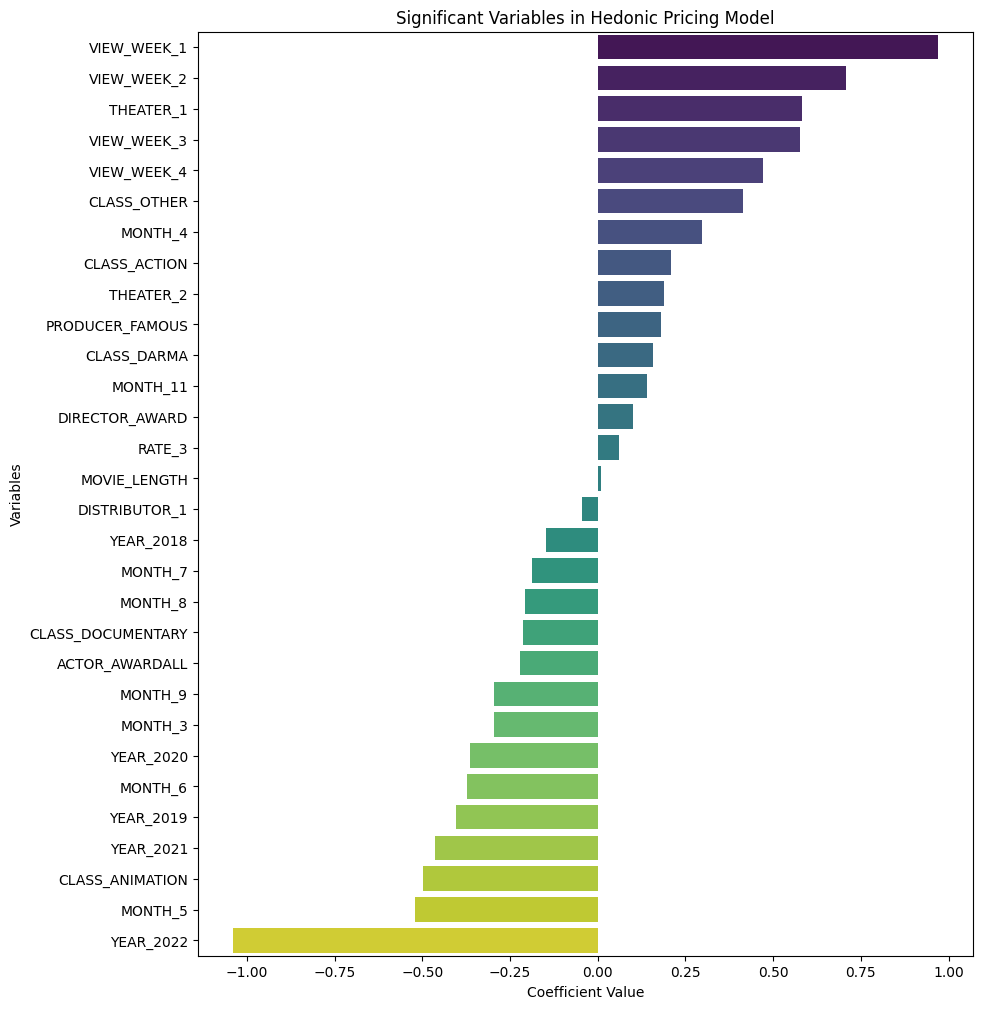

In [39]:
# 特徵價格法

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'C:\Users\User\Dropbox\Movie\Movie.csv')

# Convert column names to uppercase
data.columns = map(str.upper, data.columns)

# 取對數的AUDIENCE
data['LN_AUDIENCE'] = np.log(data['AUDIENCE'] + 1)

# Hedonic Pricing Method Regression
X = data[['CLASS_DARMA', 'CLASS_COMEDY', 'CLASS_ACTION', 'CLASS_DOCUMENTARY', 'CLASS_ANIMATION', 'CLASS_OTHER', 'MOVIE_LENGTH', 'DIRECTOR_AWARD', 'PRODUCER_FAMOUS', 'ACTOR_AWARDALL', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'VIEW_WEEK_1', 'VIEW_WEEK_2', 'VIEW_WEEK_3', 'VIEW_WEEK_4', 'THEATER_1', 'THEATER_2', 'RATE_1', 'RATE_2', 'RATE_3', 'DISTRIBUTOR_1']]
y = data['LN_AUDIENCE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Get the summary of the model
summary = model.summary2().tables[1]

# Select significant variables (p-value < 0.05) and sort by coefficient value
significant_vars = summary[summary['P>|t|'] < 0.05]
significant_vars = significant_vars.drop('const', errors='ignore')  # 去掉const
significant_vars = significant_vars.sort_values(by='Coef.', ascending=False)

# Plotting the significant variables
plt.figure(figsize=(10, 12))
sns.barplot(x=significant_vars['Coef.'], y=significant_vars.index, palette='viridis')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.title('Significant Variables in Hedonic Pricing Model')
plt.show()


In [40]:
# 計算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              feature        VIF
0               const  89.632035
1         CLASS_DARMA   2.024079
2        CLASS_COMEDY   1.817078
3        CLASS_ACTION   1.230565
4   CLASS_DOCUMENTARY   1.954419
5     CLASS_ANIMATION   1.236166
6         CLASS_OTHER   1.822984
7        MOVIE_LENGTH   1.251427
8      DIRECTOR_AWARD   1.146194
9     PRODUCER_FAMOUS   1.370495
10     ACTOR_AWARDALL   1.107740
11          YEAR_2018   1.953190
12          YEAR_2019   1.928296
13          YEAR_2020   2.372359
14          YEAR_2021   2.475602
15          YEAR_2022   2.368027
16            MONTH_2   1.653594
17            MONTH_3   1.427446
18            MONTH_4   1.339831
19            MONTH_5   1.276323
20            MONTH_6   1.226741
21            MONTH_7   1.301876
22            MONTH_8   1.435707
23            MONTH_9   1.565462
24           MONTH_10   1.542694
25           MONTH_11   1.510130
26        VIEW_WEEK_1   1.578990
27        VIEW_WEEK_2   1.550732
28        VIEW_WEEK_3   1.447649
29        

1. CLASS_DARMA: 對觀眾數量有顯著的正面影響，係數為 17.4217。
2. CLASS_DOCUMENTARY: 對觀眾數量有顯著的負面影響，係數為 -12.8812。
3. DIRECTOR_AWARD: 對觀眾數量有顯著的正面影響，係數為 10.7958。
4. YEAR_2022: 對觀眾數量有顯著的負面影響，係數為 -63.1345。